# Gradient Descent Demo

In [2]:
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
# %matplotlib inline
import random as random
import numpy as np
import csv

In [40]:
x_data = [ 338.,  333.,  328. , 207. , 226.  , 25. , 179. ,  60. , 208.,  606.]
y_data = [  640.  , 633. ,  619.  , 393.  , 428. ,   27.  , 193.  ,  66. ,  226. , 1591.]
# y_data = np.array(x_data)*3.3+-144.5
# ydata=b+w*xdata

In [41]:
#計算每個bias跟weight的loss
x=np.arange(-200,-100,1) #bias
y=np.arange(-5,5,0.1) #weight
Z=np.zeros((len(x),len(y))) #給每個位置的loss一個位置放(array)
X,Y=np.meshgrid(x,y) 
for i in range(len(x)):
    for j in range(len(y)):
        b=x[i]
        w=y[j]
        Z[j][i]=0
        for n in range(len(x_data)):
            Z[j][i]=Z[j][i]+(y_data[n]-b-w*x_data[n])**2 #計算每個數值的loss  (y-(b+w*xn))^2的平均值
        Z[j][i]=Z[j][i]/len(x_data)

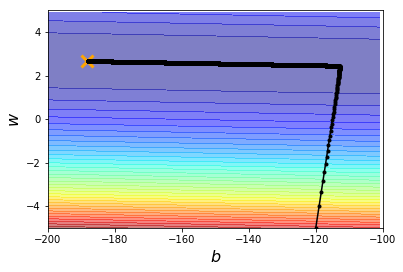

In [42]:
# ydata=b+w*xdata
b=-120 #initial b(隨意給初始bias)
w=-5 #initial w(隨意給初始weight)
lr=1 #learning rate學習效率
iteration=100000 #學習次數

#store initial values for plotting.  每次紀錄新的b跟w並將他們畫上圖
b_history=[b]
w_history=[w]


lr_b=0 ##客製化learning rate
lr_w=0 ##客製化learning rate

#Iterations 
for i in range(iteration):
    b_grad=0.0 
    w_grad=0.0
    for n in range(len(x_data)):
        b_grad=b_grad - 2.0*(y_data[n]-b-w*x_data[n])*1.0  #b的偏微分產生梯度(外維*內維) (y-b+w*xdata)^2 >>2*(y-b+w*xdata)*1
        w_grad=w_grad - 2.0*(y_data[n]-b-w*x_data[n])*x_data[n]  #w的偏微分(y-b+w*xdata)^2>>2*(y-b+w*xdata)*xdata
        
    lr_b=lr_b+b_grad**2 ##客製化learning rate
    lr_w=lr_w+w_grad**2##客製化learning rate
        
        
#     b=b-lr*b_grad #依據微分結果看出斜率正或負方向，並給予b移動
#     w=w-lr*w_grad #依據微分結果看出斜率正或負方向，並給予w移動
    
    b=b-lr/np.sqrt(lr_b)*b_grad ##客製化learning rate #np.sqrt=開根號
    w=w-lr/np.sqrt(lr_w)*w_grad ##客製化learning rate
    
    
    b_history.append(b)
    w_history.append(w)
    
# x值
plt.contourf(x,y,Z,50,alpha=0.5,cmap=plt.get_cmap("jet"))
plt.plot([-188.4],[2.67],"x",ms=12,markeredgewidth=3,color='orange')
plt.plot(b_history,w_history,"o-",ms=3,lw=1.5,color="black")
plt.xlim(-200,-100)
plt.ylim(-5,5)
plt.xlabel(r'$b$',fontsize=16)
plt.ylabel(r'$w$',fontsize=16)
plt.show()

In [43]:
b_history[-1]

-188.14538573060386

In [23]:
w_history[-1]

2.669151057358923